In [ ]:
# default_exp inferno

In [ ]:
#all_slow

In [ ]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# INFERNO loss

> API details.

In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:
from pytorch_inferno.model_wrapper import ModelWrapper
from pytorch_inferno.callback import *
from pytorch_inferno.data import get_paper_data
from pytorch_inferno.plotting import *
from pytorch_inferno.inference import *
from pytorch_inferno.utils import *

from fastcore.all import partialler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from typing import *
from collections import OrderedDict
from fastcore.all import store_attr

import torch.nn as nn
from torch import optim
import torch
from torch import Tensor
from torch import autograd

# Network

In [ ]:
bs = 200
data, test = get_paper_data(200000, bm=0, bs=bs, n_test=1000000)

In [ ]:
# export
class VariableSoftmax(nn.Softmax):
    def __init__(self, temp:float=1, dim:int=-1):
        super().__init__(dim=dim)
        self.temp = temp
        
    def forward(self, x:Tensor) -> Tensor: return super().forward(x/self.temp)

In [ ]:
x = torch.randn((1,10))

In [ ]:
VariableSoftmax(0.1)(x), VariableSoftmax(0.5)(x), VariableSoftmax(1)(x)

(tensor([[2.0492e-08, 9.9981e-01, 1.8703e-10, 1.8962e-15, 3.3516e-14, 1.8583e-04,
          1.3037e-16, 1.8234e-10, 9.0611e-06, 5.0900e-15]]),
 tensor([[2.1731e-02, 7.4947e-01, 8.4948e-03, 8.5182e-04, 1.5129e-03, 1.3446e-01,
          4.9866e-04, 8.4518e-03, 7.3487e-02, 1.0378e-03]]),
 tensor([[0.0753, 0.4422, 0.0471, 0.0149, 0.0199, 0.1873, 0.0114, 0.0470, 0.1385,
          0.0165]]))

In [ ]:
net = nn.Sequential(nn.Linear(3,100),  nn.ReLU(),
                    nn.Linear(100,100),nn.ReLU(),
                    nn.Linear(100,10), VariableSoftmax(0.1))
init_net(net)

# Loss

In [ ]:
x,y,w = next(iter(data.trn_dl))
preds = net(x)
assert preds.shape == (bs,10)

In [ ]:
class 

# Test

In [ ]:
model = ModelWrapper(net)



model.fit(200, data=data, opt=partialler(optim.SGD,lr=2e-3), loss=nn.BCELoss(),
          cbs=[LossTracker(),EarlyStopping(5)])

torch.save({'model':model.model.state_dict()}, 'weights/BCE_Test.h5')

In [ ]:
state = torch.load('weights/BCE_Test.h5', map_location='cpu')

In [ ]:
model.model.load_state_dict(state['model'])

<All keys matched successfully>

## BM 0

In [ ]:
preds = model.predict(test)

In [ ]:
preds

array([[8.7985188e-01],
       [7.1023452e-01],
       [8.4908891e-01],
       ...,
       [4.9125623e-02],
       [1.1355974e-04],
       [2.3830989e-01]], dtype=float32)

In [ ]:
df = pd.DataFrame({'pred':preds.squeeze()})
df['gen_target'] = test.dataset.y
df.head()

,pred,gen_target
0,0.879852,1.0
1,0.710235,1.0
2,0.849089,1.0
3,0.837802,1.0
4,0.974597,1.0


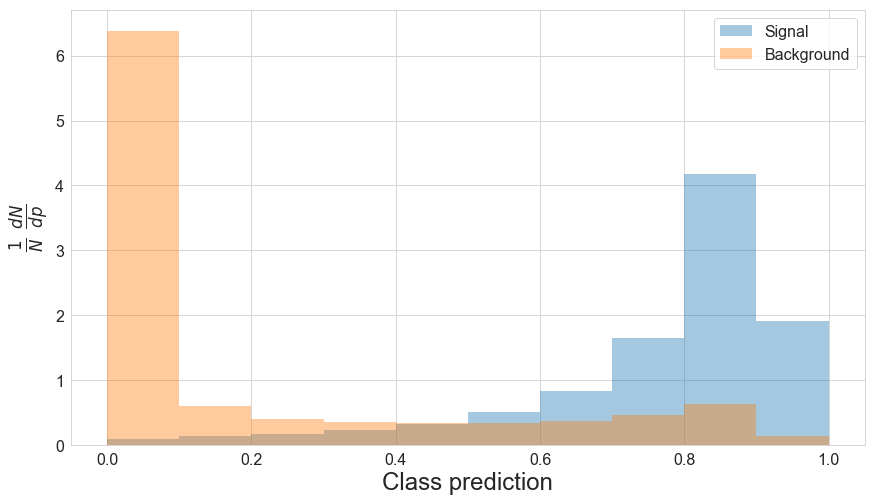

In [ ]:
plot_preds(df)

In [ ]:
bin_preds(df)

In [ ]:
df.head()

,pred,gen_target,pred_bin
0,0.879852,1.0,8
1,0.710235,1.0,7
2,0.849089,1.0,8
3,0.837802,1.0,8
4,0.974597,1.0,9


In [ ]:
f_s,f_b = get_shape(df,1),get_shape(df,0)

In [ ]:
f_s.sum(), f_b.sum()

(tensor(1.), tensor(1.0000))

In [ ]:
f_s, f_b

(tensor([0.0096, 0.0136, 0.0173, 0.0233, 0.0328, 0.0498, 0.0826, 0.1640, 0.4168,
         0.1902]),
 tensor([0.6386, 0.0595, 0.0404, 0.0347, 0.0331, 0.0335, 0.0371, 0.0460, 0.0636,
         0.0134]))

In [ ]:
asimov = (50*f_s)+(1000*f_b)

In [ ]:
asimov, asimov.sum()

(tensor([639.1222,  60.2200,  41.2362,  35.8568,  34.7749,  35.9762,  41.2679,
          54.2270,  84.4568,  22.8620]), tensor(1050.))

In [ ]:
n = 1050
x = np.linspace(20,80,61)
y = np.zeros_like(x)
for i,m in enumerate(x):
    pois = torch.distributions.Poisson((m*f_s)+(1000*f_b))
    y[i] = -pois.log_prob(asimov).sum()
y

array([31.60202026, 31.44381714, 31.29207611, 31.14694214, 31.00813293,
       30.87573242, 30.74886703, 30.62831497, 30.51418686, 30.40515137,
       30.30185699, 30.2045517 , 30.11330414, 30.02680206, 29.9458313 ,
       29.87045288, 29.8008461 , 29.73580551, 29.67596054, 29.62191772,
       29.57241058, 29.52770996, 29.48791504, 29.45320892, 29.42332458,
       29.3984108 , 29.37768936, 29.36193466, 29.35118484, 29.34424591,
       29.34178925, 29.34394073, 29.35058594, 29.36172485, 29.37665176,
       29.39604568, 29.42022324, 29.44763565, 29.47921753, 29.51564026,
       29.55555725, 29.59913635, 29.646698  , 29.69836426, 29.75433731,
       29.81342697, 29.87630844, 29.943573  , 30.01407623, 30.08797455,
       30.16571045, 30.24684143, 30.3316803 , 30.42036819, 30.51228714,
       30.60735703, 30.70651627, 30.80847931, 30.91388702, 31.0224762 ,
       31.13447571])

In [ ]:
y_tf2 = np.array([31.626238,31.466385,31.313095,31.166267,31.025808,30.891619,30.76361
,30.641693,30.525778,30.415783,30.31162,30.213215,30.120483,30.033348
,29.951736,29.875574,29.804789,29.739307,29.679066,29.623993,29.574026
,29.5291,29.489151,29.454117,29.423939,29.398558,29.377914,29.361954
,29.35062,29.343859,29.341618,29.343842,29.350483,29.36149,29.376812
,29.396404,29.420216,29.448202,29.480318,29.516518,29.556757,29.600994
,29.649185,29.70129,29.757267,29.817076,29.88068,29.948036,30.019108
,30.093859,30.17225,30.25425,30.339819,30.42892,30.521524,30.617598
,30.7171,30.820007,30.926281,31.035892,31.148808], dtype='float32')

In [ ]:
y_tf2-y_tf2.min()

array([2.2846203e+00, 2.1247673e+00, 1.9714775e+00, 1.8246498e+00,
       1.6841908e+00, 1.5500011e+00, 1.4219933e+00, 1.3000755e+00,
       1.1841602e+00, 1.0741653e+00, 9.7000313e-01, 8.7159729e-01,
       7.7886581e-01, 6.9173050e-01, 6.1011887e-01, 5.3395653e-01,
       4.6317101e-01, 3.9768982e-01, 3.3744812e-01, 2.8237534e-01,
       2.3240852e-01, 1.8748283e-01, 1.4753342e-01, 1.1249924e-01,
       8.2321167e-02, 5.6940079e-02, 3.6296844e-02, 2.0336151e-02,
       9.0026855e-03, 2.2411346e-03, 0.0000000e+00, 2.2239685e-03,
       8.8653564e-03, 1.9872665e-02, 3.5194397e-02, 5.4786682e-02,
       7.8598022e-02, 1.0658455e-01, 1.3870049e-01, 1.7490005e-01,
       2.1513939e-01, 2.5937653e-01, 3.0756760e-01, 3.5967255e-01,
       4.1564941e-01, 4.7545815e-01, 5.3906250e-01, 6.0641861e-01,
       6.7749023e-01, 7.5224113e-01, 8.3063316e-01, 9.1263199e-01,
       9.9820137e-01, 1.0873032e+00, 1.1799068e+00, 1.2759800e+00,
       1.3754826e+00, 1.4783897e+00, 1.5846634e+00, 1.6942749e

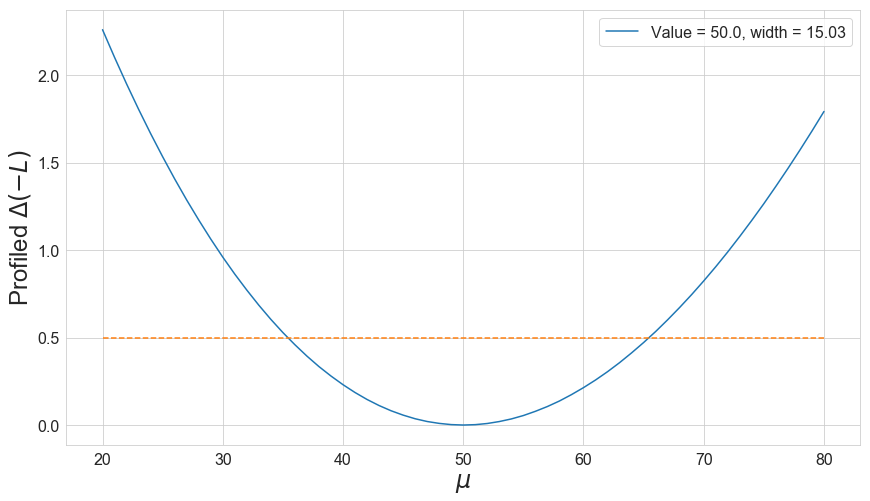

In [ ]:
plot_likelihood(y-y.min())

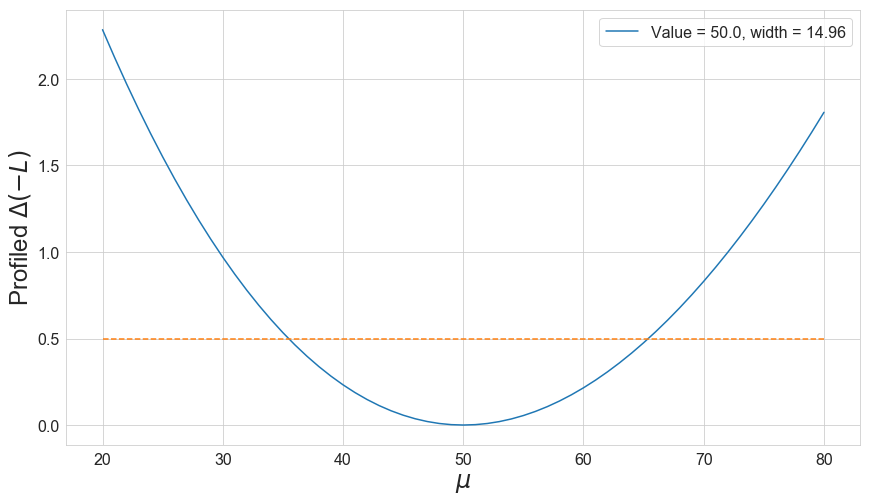

In [ ]:
plot_likelihood(y_tf2-y_tf2.min())

# Nuisances - via interpolation

In [ ]:
bkg = test.dataset.x[test.dataset.y.squeeze() == 0]
assert len(bkg) == 500000

In [ ]:
b_shapes = get_paper_syst_shapes(bkg, df, model=model)

Running: r=-0.2


Running: r=0


Running: r=0.2


Running: l=2.5


Running: l=3


Running: l=3.5


In [ ]:
df

,pred,gen_target,pred_bin,pred_-0.2_3,pred_-0.2_3_bin,pred_0_3,pred_0_3_bin,pred_0.2_3,pred_0.2_3_bin,pred_0_2.5,pred_0_2.5_bin,pred_0_3.5,pred_0_3.5_bin
0,0.879852,1.0,8,0.879852,8,0.879852,8,0.879852,8,0.879852,8,0.879852,8
1,0.710235,1.0,7,0.710235,7,0.710235,7,0.710235,7,0.710235,7,0.710235,7
2,0.849089,1.0,8,0.849089,8,0.849089,8,0.849089,8,0.849089,8,0.849089,8
3,0.837802,1.0,8,0.837802,8,0.837802,8,0.837802,8,0.837802,8,0.837802,8
4,0.974597,1.0,9,0.974597,9,0.974597,9,0.974597,9,0.974597,9,0.974597,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.007644,0.0,0,0.012467,0,0.007644,0,0.004693,0,0.006360,0,0.009715,0
999996,0.037261,0.0,0,0.049676,0,0.037261,0,0.026466,0,0.035924,0,0.038646,0
999997,0.049126,0.0,0,0.081481,0,0.049126,0,0.029209,0,0.044197,0,0.054368,0
999998,0.000114,0.0,0,0.000176,0,0.000114,0,0.000073,0,0.000109,0,0.000119,0


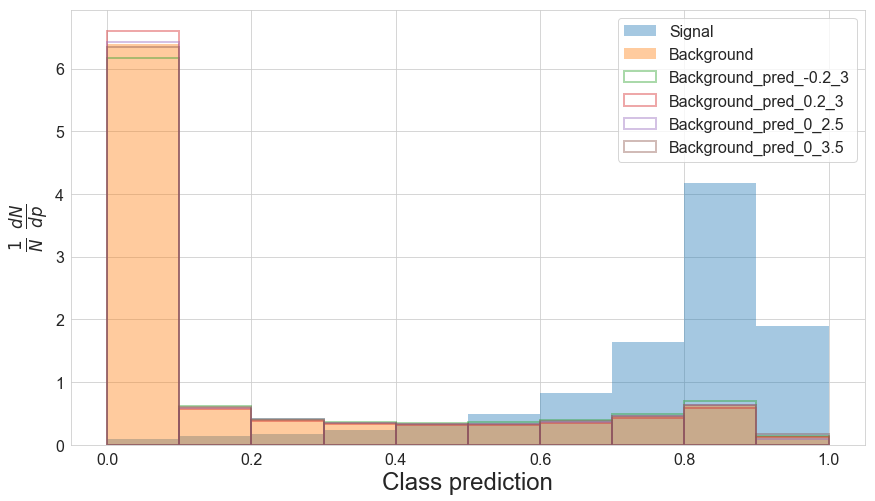

In [ ]:
plot_preds(df, pred_names=['pred', 'pred_-0.2_3', 'pred_0.2_3', 'pred_0_2.5', 'pred_0_3.5'])

In [ ]:
b_shapes['f_b_nom']

tensor([0.6386, 0.0595, 0.0404, 0.0347, 0.0331, 0.0335, 0.0371, 0.0460, 0.0636,
        0.0134])

In [ ]:
b_shapes['f_b_up']

tensor([[0.6604, 0.0576, 0.0385, 0.0329, 0.0311, 0.0318, 0.0348, 0.0426, 0.0580,
         0.0123],
        [0.6344, 0.0596, 0.0403, 0.0346, 0.0329, 0.0334, 0.0372, 0.0462, 0.0641,
         0.0171]])

In [ ]:
b_shapes['f_b_dw']

tensor([[0.6175, 0.0618, 0.0418, 0.0360, 0.0347, 0.0357, 0.0396, 0.0493, 0.0691,
         0.0145],
        [0.6430, 0.0594, 0.0404, 0.0348, 0.0333, 0.0335, 0.0370, 0.0457, 0.0632,
         0.0097]])

In [ ]:
f_s

tensor([0.0096, 0.0136, 0.0173, 0.0233, 0.0328, 0.0498, 0.0826, 0.1640, 0.4168,
        0.1902])

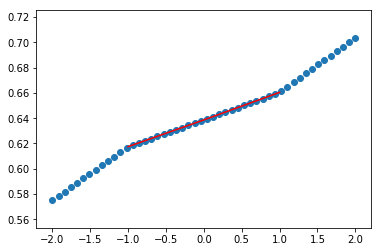

In [ ]:
i = 0
d = b_shapes['f_b_dw'][0][i]
n = b_shapes['f_b_nom'][i]
u = b_shapes['f_b_up'][0][i]
interp = []
rs = np.linspace(-2,2)
for r in rs: interp.append(interp_shape(Tensor((r,0))[None,:], **b_shapes)[0][i].data.item())
plt.scatter(rs, interp)
plt.plot([-1,0,1],[d,n,u], label=i, color='r')

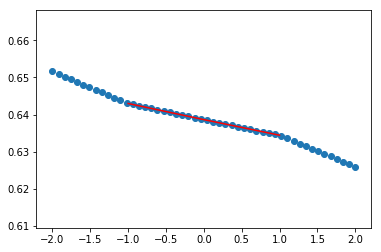

In [ ]:
i = 0
d = b_shapes['f_b_dw'][1][i]
n = b_shapes['f_b_nom'][i]
u = b_shapes['f_b_up'][1][i]
interp = []
ls = np.linspace(-2,2)
for l in ls: interp.append(interp_shape(Tensor((0,l))[None,:], **b_shapes)[0][i].data.item())
plt.scatter(ls, interp)
plt.plot([-1,0,1],[d,n,u], label=i, color='r')

In [ ]:
b_shapes['f_b_nom']

tensor([0.6386, 0.0595, 0.0404, 0.0347, 0.0331, 0.0335, 0.0371, 0.0460, 0.0636,
        0.0134])

In [ ]:
alpha = Tensor((1,0))[None,:]
interp_shape(alpha, **b_shapes).squeeze()

tensor([0.6604, 0.0576, 0.0385, 0.0329, 0.0311, 0.0318, 0.0348, 0.0426, 0.0580,
        0.0123])

In [ ]:
b_shapes['f_b_up']

tensor([[0.6604, 0.0576, 0.0385, 0.0329, 0.0311, 0.0318, 0.0348, 0.0426, 0.0580,
         0.0123],
        [0.6344, 0.0596, 0.0403, 0.0346, 0.0329, 0.0334, 0.0372, 0.0462, 0.0641,
         0.0171]])

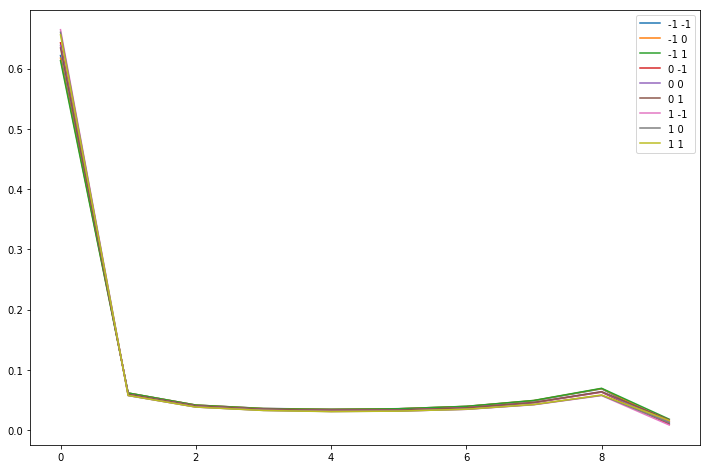

In [ ]:
fig = plt.figure(figsize=(12,8))
for r in [-1,0,1]:
    for l in [-1,0,1]:
        alpha = Tensor((r,l))[None,:]
        s = interp_shape(alpha, **b_shapes).squeeze()
        plt.plot(s, label=f'{r} {l}')
plt.legend()

# Newton

## BM 1
r free, l fixed

In [ ]:
bm1_b_shapes = OrderedDict([('f_b_nom', b_shapes['f_b_nom']),
                            ('f_b_up',  b_shapes['f_b_up'][0][None,:]),
                            ('f_b_dw',  b_shapes['f_b_dw'][0][None,:])])

In [ ]:
bm1_b_shapes['f_b_up'].shape

torch.Size([1, 10])

In [ ]:
nll = likelihood_from_updw(f_s=f_s, n_steps=100, **bm1_b_shapes)

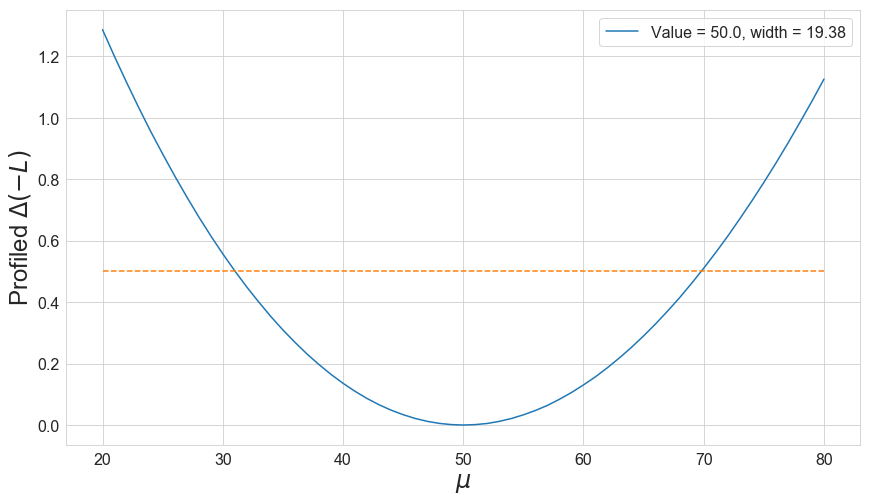

In [ ]:
plot_likelihood(nll-nll.min())

## BM 1l
r fixed, l free

In [ ]:
bm1l_b_shapes = OrderedDict([('f_b_nom', b_shapes['f_b_nom']),
                             ('f_b_up',  b_shapes['f_b_up'][1][None,:]),
                             ('f_b_dw',  b_shapes['f_b_dw'][1][None,:])])

In [ ]:
nll = likelihood_from_updw(f_s=f_s, n_steps=100, **bm1l_b_shapes)

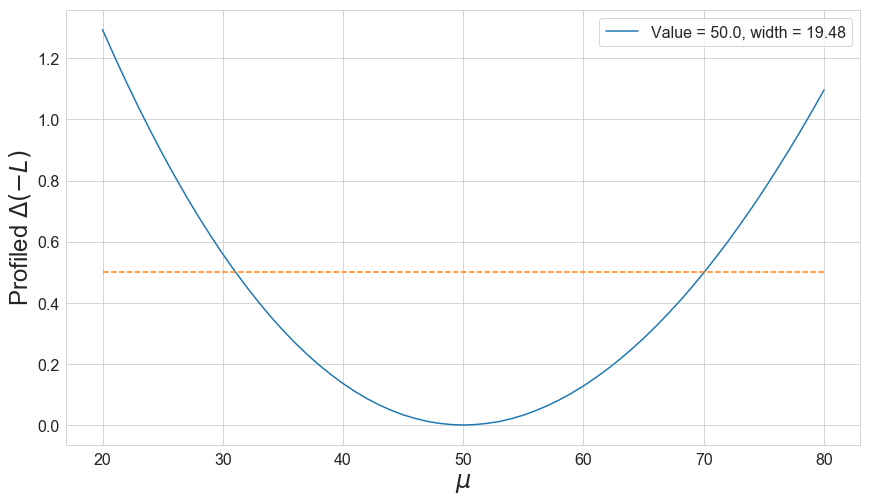

In [ ]:
plot_likelihood(nll-nll.min())

## BM 2

In [ ]:
nll = likelihood_from_updw(f_s=f_s, n_steps=100, **b_shapes)

In [ ]:
nll, nll.min()

(array([30.1570549 , 30.10259628, 30.04972839, 29.99914551, 29.94996643,
        29.90369797, 29.85953522, 29.81665802, 29.77558899, 29.73662949,
        29.69942474, 29.66404724, 29.63043213, 29.59934235, 29.56991577,
        29.54195404, 29.51596832, 29.49161148, 29.46929169, 29.4487648 ,
        29.43047333, 29.41372681, 29.39826202, 29.38532257, 29.37371063,
        29.36361694, 29.35594177, 29.34983444, 29.34530258, 29.34277344,
        29.34178925, 29.34276962, 29.34528351, 29.3498764 , 29.35596848,
        29.36355972, 29.37309265, 29.38446045, 29.39734268, 29.41183472,
        29.42819595, 29.44612885, 29.46604538, 29.48732758, 29.51033401,
        29.53553009, 29.56163788, 29.58942032, 29.6191864 , 29.65100098,
        29.68361664, 29.71821594, 29.75456238, 29.79251099, 29.83217239,
        29.87289429, 29.91543198, 29.95998001, 30.00567627, 30.05271912,
        30.10192871]), 29.34178924560547)

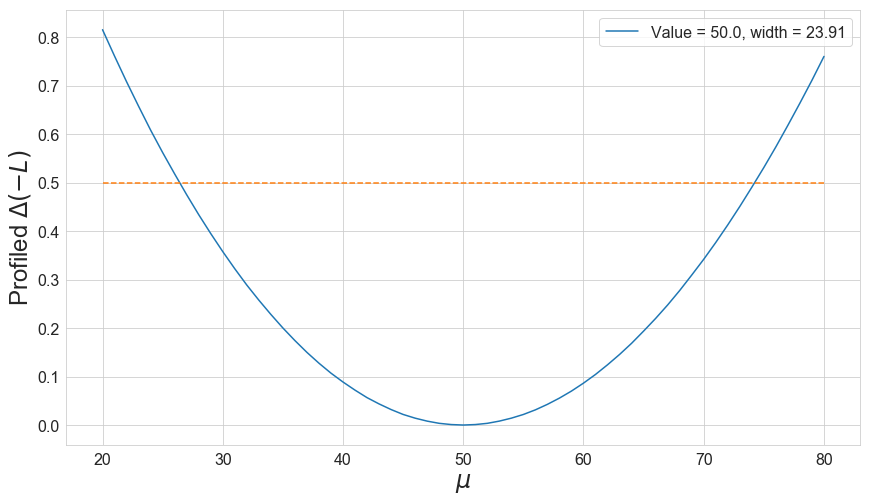

In [ ]:
plot_likelihood(nll-nll.min())

# Random

## BM 1
r free, l fixed

In [ ]:
bm1_b_shapes = OrderedDict([('f_b_nom', b_shapes['f_b_nom']),
                            ('f_b_up',  b_shapes['f_b_up'][0][None,:]),
                            ('f_b_dw',  b_shapes['f_b_dw'][0][None,:])])

In [ ]:
bm1_b_shapes['f_b_up'].shape

torch.Size([1, 10])

In [ ]:
nll = likelihood_from_updw_random(f_s=f_s, n_steps=100, **bm1_b_shapes)

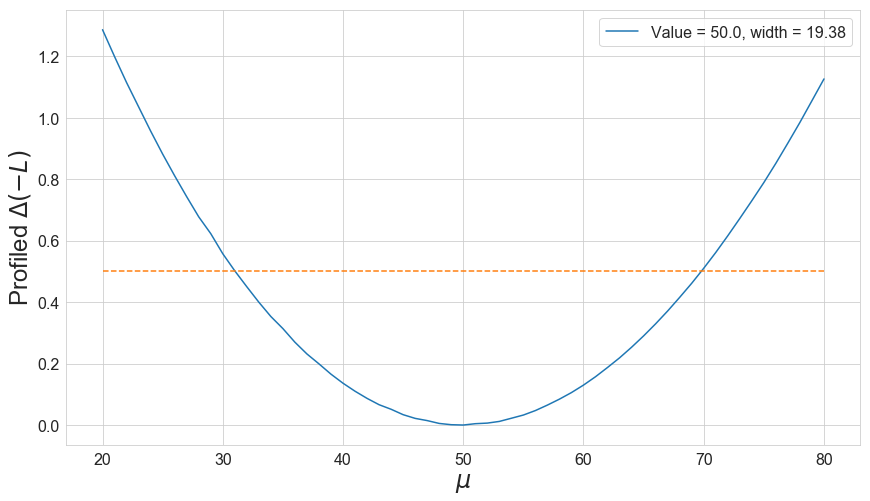

In [ ]:
plot_likelihood(nll-nll.min())

## BM 1l
r fixed, l free

In [ ]:
bm1l_b_shapes = OrderedDict([('f_b_nom', b_shapes['f_b_nom']),
                             ('f_b_up',  b_shapes['f_b_up'][1][None,:]),
                             ('f_b_dw',  b_shapes['f_b_dw'][1][None,:])])

In [ ]:
nll = likelihood_from_updw_random(f_s=f_s, n_steps=100, **bm1l_b_shapes)

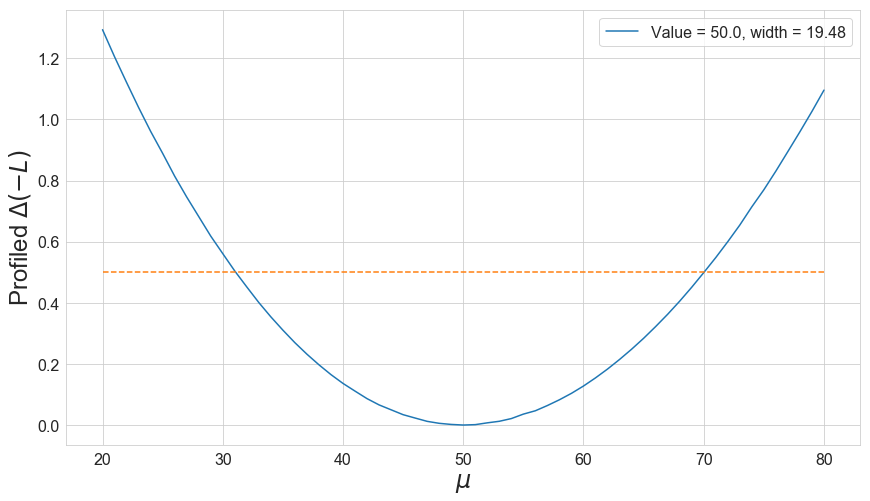

In [ ]:
plot_likelihood(nll-nll.min())

## BM 2

In [ ]:
nll = likelihood_from_updw_random(f_s=f_s, n_steps=1000,
                           f_b_nom=b_shapes['f_b_nom'], f_b_up=b_shapes['f_b_up'], f_b_dw=b_shapes['f_b_dw'])

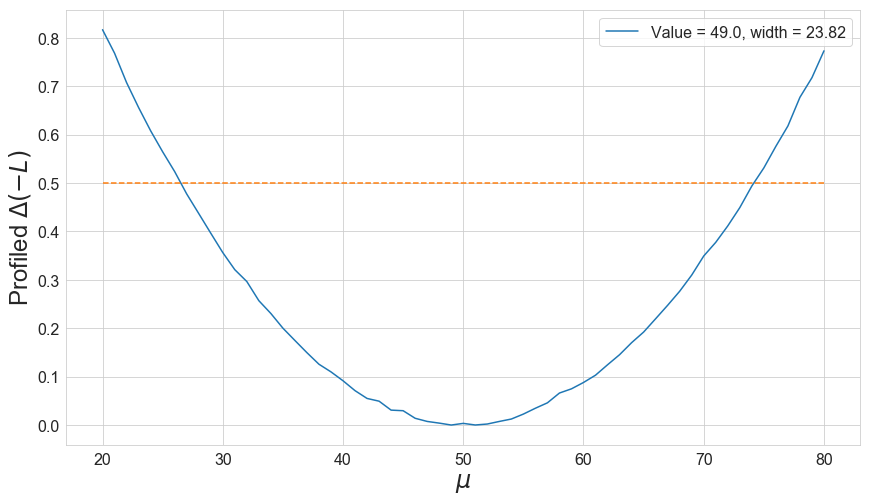

In [ ]:
plot_likelihood(nll-nll.min())